## I followed along with this example:
https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
shampoo = pd.read_csv('shampoo.csv', index_col=[0], parse_dates=True)

In [4]:
shampoo.head()

,Sales
Month,
1-Jan,266.0
2-Jan,145.9
3-Jan,183.1
4-Jan,119.3
5-Jan,180.3


In [5]:
shampoo.index

Index(['1-Jan', '2-Jan', '3-Jan', '4-Jan', '5-Jan', '6-Jan', '7-Jan', '8-Jan',
       '9-Jan', '10-Jan', '11-Jan', '12-Jan', '1-Feb', '2-Feb', '3-Feb',
       '4-Feb', '5-Feb', '6-Feb', '7-Feb', '8-Feb', '9-Feb', '10-Feb',
       '11-Feb', '12-Feb', '1-Mar', '2-Mar', '3-Mar', '4-Mar', '5-Mar',
       '6-Mar', '7-Mar', '8-Mar', '9-Mar', '10-Mar', '11-Mar', '12-Mar'],
      dtype='object', name='Month')

In [6]:
# shampoo.index = pd.to_datetime(shampoo.index, dayfirst=True)

shampoo.index = pd.to_datetime(shampoo.index, format="%d-%b")

In [7]:
shampoo.index

DatetimeIndex(['1900-01-01', '1900-01-02', '1900-01-03', '1900-01-04',
               '1900-01-05', '1900-01-06', '1900-01-07', '1900-01-08',
               '1900-01-09', '1900-01-10', '1900-01-11', '1900-01-12',
               '1900-02-01', '1900-02-02', '1900-02-03', '1900-02-04',
               '1900-02-05', '1900-02-06', '1900-02-07', '1900-02-08',
               '1900-02-09', '1900-02-10', '1900-02-11', '1900-02-12',
               '1900-03-01', '1900-03-02', '1900-03-03', '1900-03-04',
               '1900-03-05', '1900-03-06', '1900-03-07', '1900-03-08',
               '1900-03-09', '1900-03-10', '1900-03-11', '1900-03-12'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [8]:
shampoo['Sales']

Month
1900-01-01    266.0
1900-01-02    145.9
1900-01-03    183.1
1900-01-04    119.3
1900-01-05    180.3
1900-01-06    168.5
1900-01-07    231.8
1900-01-08    224.5
1900-01-09    192.8
1900-01-10    122.9
1900-01-11    336.5
1900-01-12    185.9
1900-02-01    194.3
1900-02-02    149.5
1900-02-03    210.1
1900-02-04    273.3
1900-02-05    191.4
1900-02-06    287.0
1900-02-07    226.0
1900-02-08    303.6
1900-02-09    289.9
1900-02-10    421.6
1900-02-11    264.5
1900-02-12    342.3
1900-03-01    339.7
1900-03-02    440.4
1900-03-03    315.9
1900-03-04    439.3
1900-03-05    401.3
1900-03-06    437.4
1900-03-07    575.5
1900-03-08    407.6
1900-03-09    682.0
1900-03-10    475.3
1900-03-11    581.3
1900-03-12    646.9
Name: Sales, dtype: float64

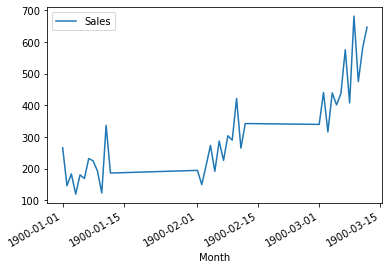

In [9]:
shampoo.plot()

In [10]:
shampoo.size

36

36 data points

In [11]:
shampoo.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [12]:
shampoo_moving_avg = shampoo.rolling(window=10).mean()

In [13]:
shampoo_moving_avg

,Sales
Month,
1900-01-01,NaN
1900-01-02,NaN
1900-01-03,NaN
1900-01-04,NaN
1900-01-05,NaN
1900-01-06,NaN
1900-01-07,NaN
1900-01-08,NaN
1900-01-09,NaN


Since the window=10, the first 10 days won't have any data. 
11th day will have avg of previous 10 days (1-Jan to 10-Jan), 
12th day will have avg of previous 10 days (2-Jan to 11-Jan),
and so on...

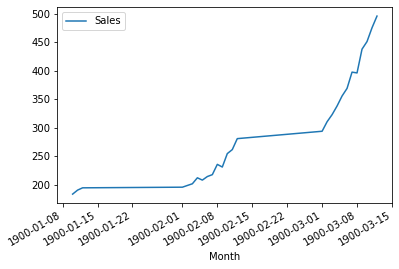

In [14]:
shampoo_moving_avg.plot()

### Create a baseline model

#### A baseline model aka naive model aka initial model:

#### Assume previous value is the best estimator for the next value
#### We have data up to 12th March, according to naive model, the predicted sales for 13th March will be the sale of 12th March i.e 646.9

In [15]:
shampoo_base = pd.concat([shampoo, shampoo.shift(1)], axis=1)

In [16]:
shampoo_base.columns = ['Actual_Sales', 'Naive_Forecast_Sales']

In [17]:
shampoo_base.head()

,Actual_Sales,Naive_Forecast_Sales
Month,,
1900-01-01,266.0,NaN
1900-01-02,145.9,266.0
1900-01-03,183.1,145.9
1900-01-04,119.3,183.1
1900-01-05,180.3,119.3


In [18]:
shampoo_base.dropna(inplace=True)

shampoo_base.head()

,Actual_Sales,Naive_Forecast_Sales
Month,,
1900-01-02,145.9,266.0
1900-01-03,183.1,145.9
1900-01-04,119.3,183.1
1900-01-05,180.3,119.3
1900-01-06,168.5,180.3


#### Let's evaluate this naive model:

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [20]:
shampoo_error = mean_squared_error(shampoo_base.Actual_Sales, shampoo_base.Naive_Forecast_Sales)
shampoo_error

11715.388285714285

In [21]:
rmse = np.sqrt(shampoo_error)
rmse

108.23764726616282

#### This is pretty bad. Before moving on to the ARIMA model, we have to check the stationarity of the time-series

#### A time-series needs to be transformed to being stationary to apply ARIMA on it

#### There are 2 ways to check stationarity: Rolling mean test and Augmented Dickey Fuller Test (ADFT)

#### Rolling mean is visual test where you have to see if there's visible trend with the rolling mean and rolling std dev

#### Dickey Fuller Test is more preferred as it is a statistical test

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
print("Result of Dickey-Fuller Test:")

df_test = adfuller(shampoo['Sales'], autolag='AIC')

dfoutput = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'No. of Observations Used'])

for key, value in df_test[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic               3.060142
p-value                      1.000000
#Lags Used                  10.000000
No. of Observations Used    25.000000
Critical Value (1%)         -3.723863
Critical Value (5%)         -2.986489
Critical Value (10%)        -2.632800
dtype: float64


#### The key thing to note from ADFT is the p-value. 
#### Out null hypothesis: series is non-stationary 
#### If p-value < 0.05 significance level (5%), then we can reject Null hypothesis
#### if p-value > 0.05, we can't reject null Null hypothesis

#### In this case, since p-value is 1.0 and > 0.05, we can't reject Null hypothesis. Thus series is stationary

##### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### We take log of data to see if we can make this series stationary

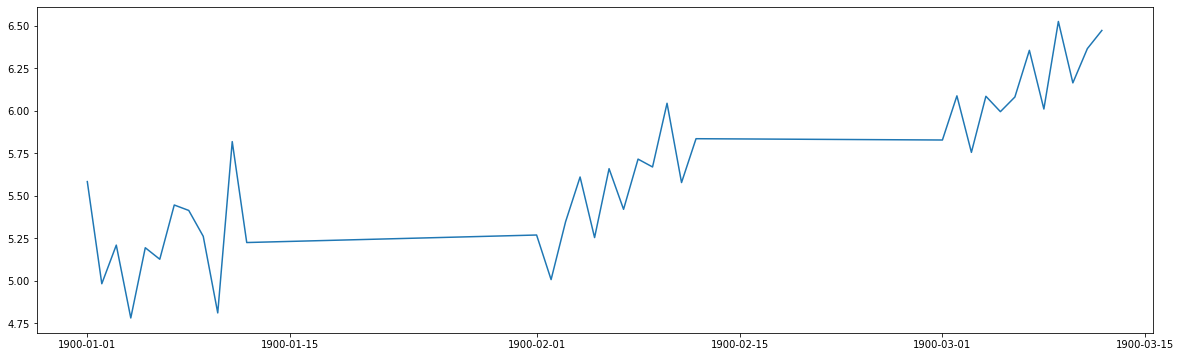

In [24]:
shampoo_logscale = np.log(shampoo)

plt.figure(figsize=(20,6))
plt.plot(shampoo_logscale)

#### Log scale preserves the trend as seen in the original plot below

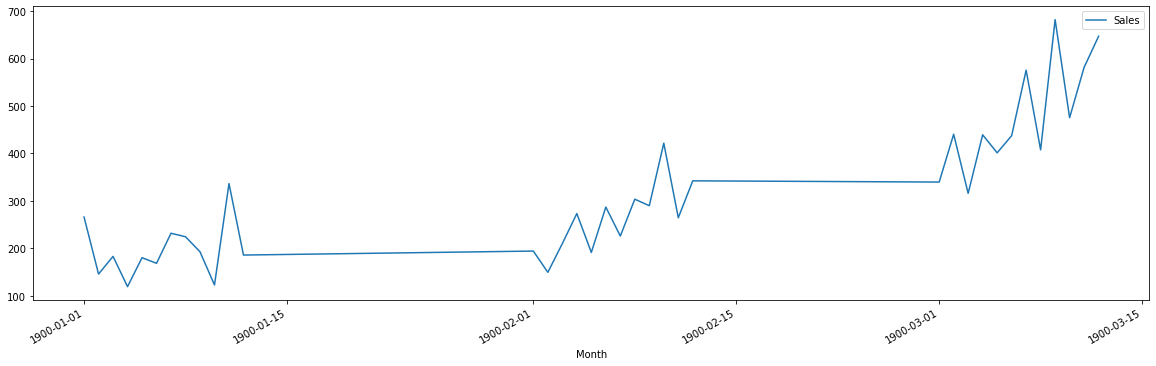

In [25]:
shampoo.plot(figsize=(20,6))

In [26]:
def test_stationarity(timeseries, target_column):
    # Determine Rolling Statistic
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics:
    plt.figure(figsize=(20,6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    
    plt.legend(loc='best')
    plt.title("Rolling Mean & Std Dev")
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print("Result of Dickey-Fuller Test:")
    df_test = adfuller(timeseries[target_column], autolag='AIC')
    dfoutput = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'No. of Observations Used'])
    for key, value in df_test[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

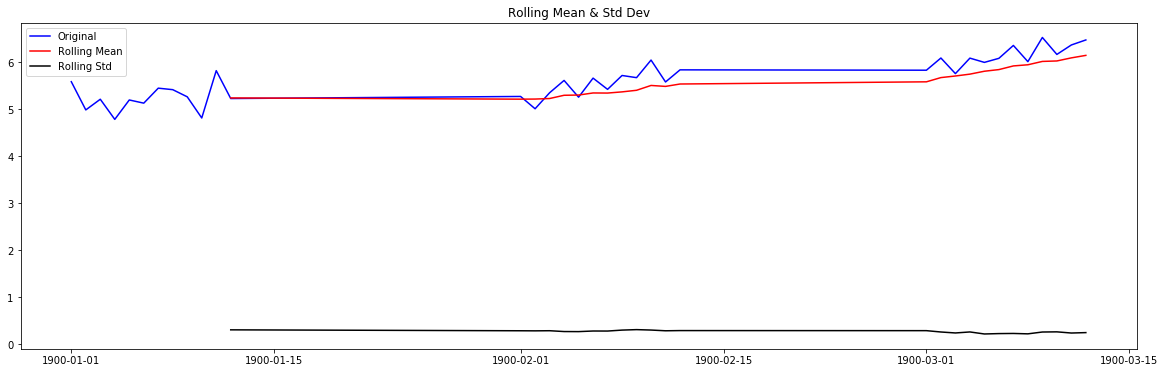

Result of Dickey-Fuller Test:
Test Statistic               1.798463
p-value                      0.998346
#Lags Used                  10.000000
No. of Observations Used    25.000000
Critical Value (1%)         -3.723863
Critical Value (5%)         -2.986489
Critical Value (10%)        -2.632800
dtype: float64


In [27]:
test_stationarity(shampoo_logscale, 'Sales')

#### p-value still > 0.05 so we did not achieve stationarity
#### Let's try making some more logscale transformation to find stationarity

In [28]:
shampoo_logScale_minus_movingAvg = shampoo_logscale - shampoo_moving_avg
shampoo_logScale_minus_movingAvg

,Sales
Month,
1900-01-01,NaN
1900-01-02,NaN
1900-01-03,NaN
1900-01-04,NaN
1900-01-05,NaN
1900-01-06,NaN
1900-01-07,NaN
1900-01-08,NaN
1900-01-09,NaN


In [29]:
shampoo_logScale_minus_movingAvg.dropna(inplace=True)
shampoo_logScale_minus_movingAvg.head(10)

,Sales
Month,
1900-01-10,-178.698629
1900-01-11,-184.741402
1900-01-12,-189.334791
1900-02-01,-190.410597
1900-02-02,-193.692704
1900-02-03,-196.332416
1900-02-04,-206.549430
1900-02-05,-202.865635
1900-02-06,-208.710518


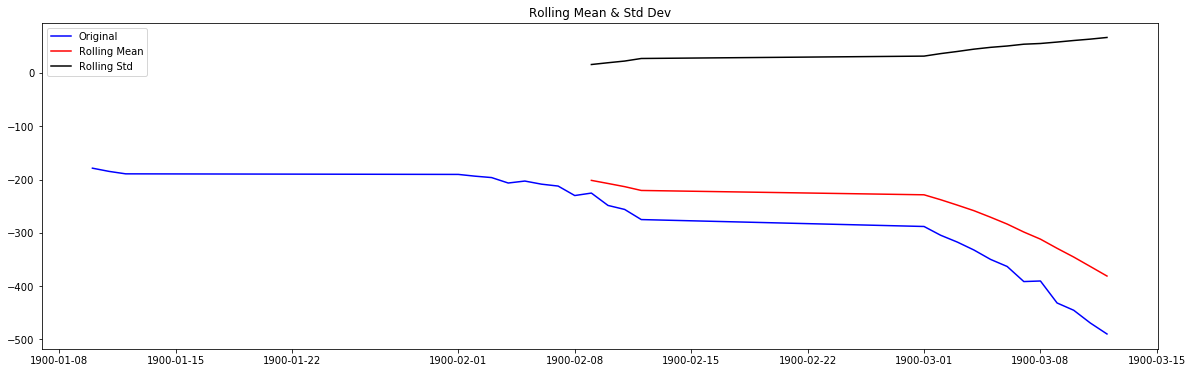

Result of Dickey-Fuller Test:
Test Statistic               3.199058
p-value                      1.000000
#Lags Used                   2.000000
No. of Observations Used    24.000000
Critical Value (1%)         -3.737709
Critical Value (5%)         -2.992216
Critical Value (10%)        -2.635747
dtype: float64


In [30]:
test_stationarity(shampoo_logScale_minus_movingAvg, 'Sales')

#### Stationarity still not achieved
#### Applying diff method to see if we can achieve Stationarity

In [31]:
shampoo.diff().head(10)

,Sales
Month,
1900-01-01,NaN
1900-01-02,-120.1
1900-01-03,37.2
1900-01-04,-63.8
1900-01-05,61.0
1900-01-06,-11.8
1900-01-07,63.3
1900-01-08,-7.3
1900-01-09,-31.7


In [32]:
shampoo.diff().fillna(shampoo).head(10)

,Sales
Month,
1900-01-01,266.0
1900-01-02,-120.1
1900-01-03,37.2
1900-01-04,-63.8
1900-01-05,61.0
1900-01-06,-11.8
1900-01-07,63.3
1900-01-08,-7.3
1900-01-09,-31.7


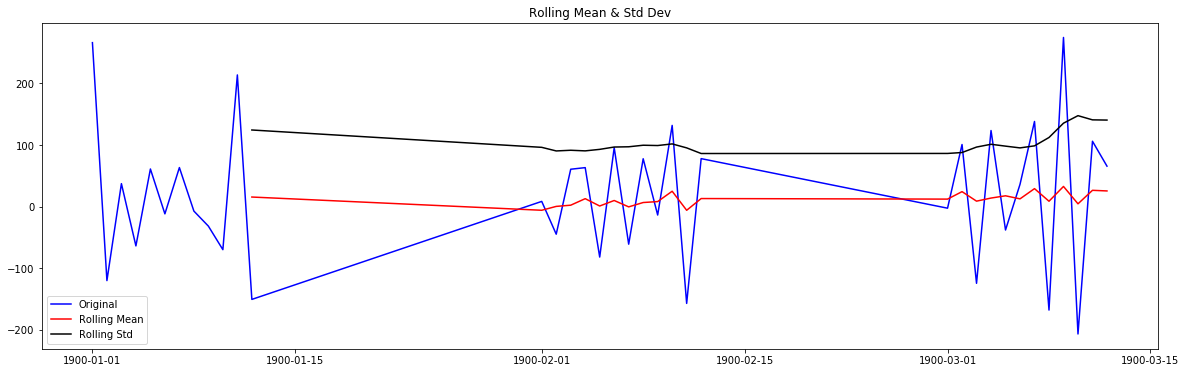

Result of Dickey-Fuller Test:
Test Statistic             -7.697502e+00
p-value                     1.366875e-11
#Lags Used                  1.000000e+00
No. of Observations Used    3.400000e+01
Critical Value (1%)        -3.639224e+00
Critical Value (5%)        -2.951230e+00
Critical Value (10%)       -2.614447e+00
dtype: float64


In [33]:
test_stationarity(shampoo.diff().fillna(shampoo), 'Sales')

In [34]:
def dickey_fuller_test(timeseries, target_column):
    print("Result of Dickey-Fuller Test:")
    df_test = adfuller(timeseries[target_column], autolag='AIC')
    dfoutput = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'No. of Observations Used'])
    for key, value in df_test[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)
    return dfoutput['p-value']

#### Let's do this dynamically

In [35]:
def get_d_for_stationarity(timeseries, target_column):
    for i in range(0,5):
        print(i)
        timeseries = timeseries.diff().fillna(timeseries)
        
        p_value = dickey_fuller_test(timeseries, target_column)
        
        if p_value < 0.05:
            return i+1, timeseries

    

In [36]:
d, shampoo_diff = get_d_for_stationarity(shampoo, 'Sales')
d

0
Result of Dickey-Fuller Test:
Test Statistic             -7.697502e+00
p-value                     1.366875e-11
#Lags Used                  1.000000e+00
No. of Observations Used    3.400000e+01
Critical Value (1%)        -3.639224e+00
Critical Value (5%)        -2.951230e+00
Critical Value (10%)       -2.614447e+00
dtype: float64


1

### So we get d=1
#### NOTE:
We will need this value for ARIMA modeling

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

This is just me checking a few things

In [37]:
p_value = dickey_fuller_test(shampoo, 'Sales')
p_value

Result of Dickey-Fuller Test:
Test Statistic               3.060142
p-value                      1.000000
#Lags Used                  10.000000
No. of Observations Used    25.000000
Critical Value (1%)         -3.723863
Critical Value (5%)         -2.986489
Critical Value (10%)        -2.632800
dtype: float64


1.0

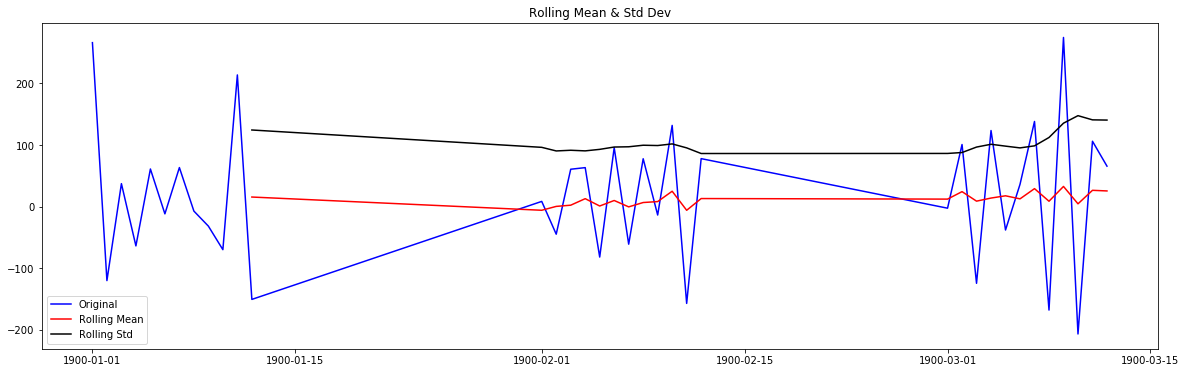

Result of Dickey-Fuller Test:
Test Statistic             -7.697502e+00
p-value                     1.366875e-11
#Lags Used                  1.000000e+00
No. of Observations Used    3.400000e+01
Critical Value (1%)        -3.639224e+00
Critical Value (5%)        -2.951230e+00
Critical Value (10%)       -2.614447e+00
dtype: float64


In [38]:
test_stationarity(shampoo_diff, 'Sales')

In [39]:
shampoo_diff.head()

,Sales
Month,
1900-01-01,266.0
1900-01-02,-120.1
1900-01-03,37.2
1900-01-04,-63.8
1900-01-05,61.0


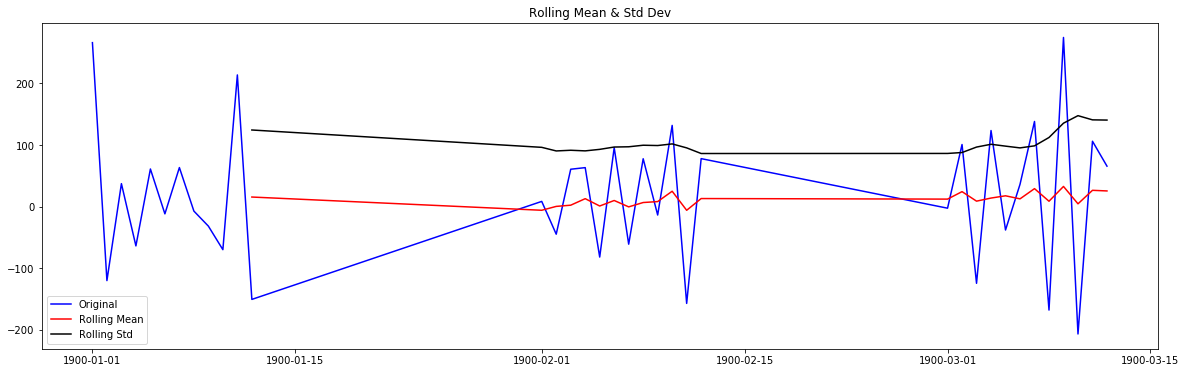

Result of Dickey-Fuller Test:
Test Statistic             -7.697502e+00
p-value                     1.366875e-11
#Lags Used                  1.000000e+00
No. of Observations Used    3.400000e+01
Critical Value (1%)        -3.639224e+00
Critical Value (5%)        -2.951230e+00
Critical Value (10%)       -2.614447e+00
dtype: float64


In [40]:
test_stationarity(shampoo_diff, 'Sales')

### Now let's look at the components of shampoo time-series

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

Time Series Components
A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

* Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
* Non-Systematic: Components of the time series that cannot be directly modeled.
A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

* Level: The average value in the series.
* Trend: The increasing or decreasing value in the series.
* Seasonality: The repeating short-term cycle in the series.
* Noise: The random variation in the series.

#### Combining Time Series Components
A series is thought to be an aggregate or combination of these four components.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively.

#### Additive Model:
y(t) = Level + Trend + Seasonality + Noise

An additive model is linear where changes over time are consistently made by the same amount.

A linear trend is a straight line.

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

#### Multiplicative Model:
y(t) = Level * Trend * Seasonality * Noise

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

#### Decomposition as a Tool
It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.


In [42]:
# You have to mention period for seasonal_decompose. For this time series, data is available for 12 days each month
# so I set period = 12
decomposition = seasonal_decompose(shampoo, period = 12)

In [43]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

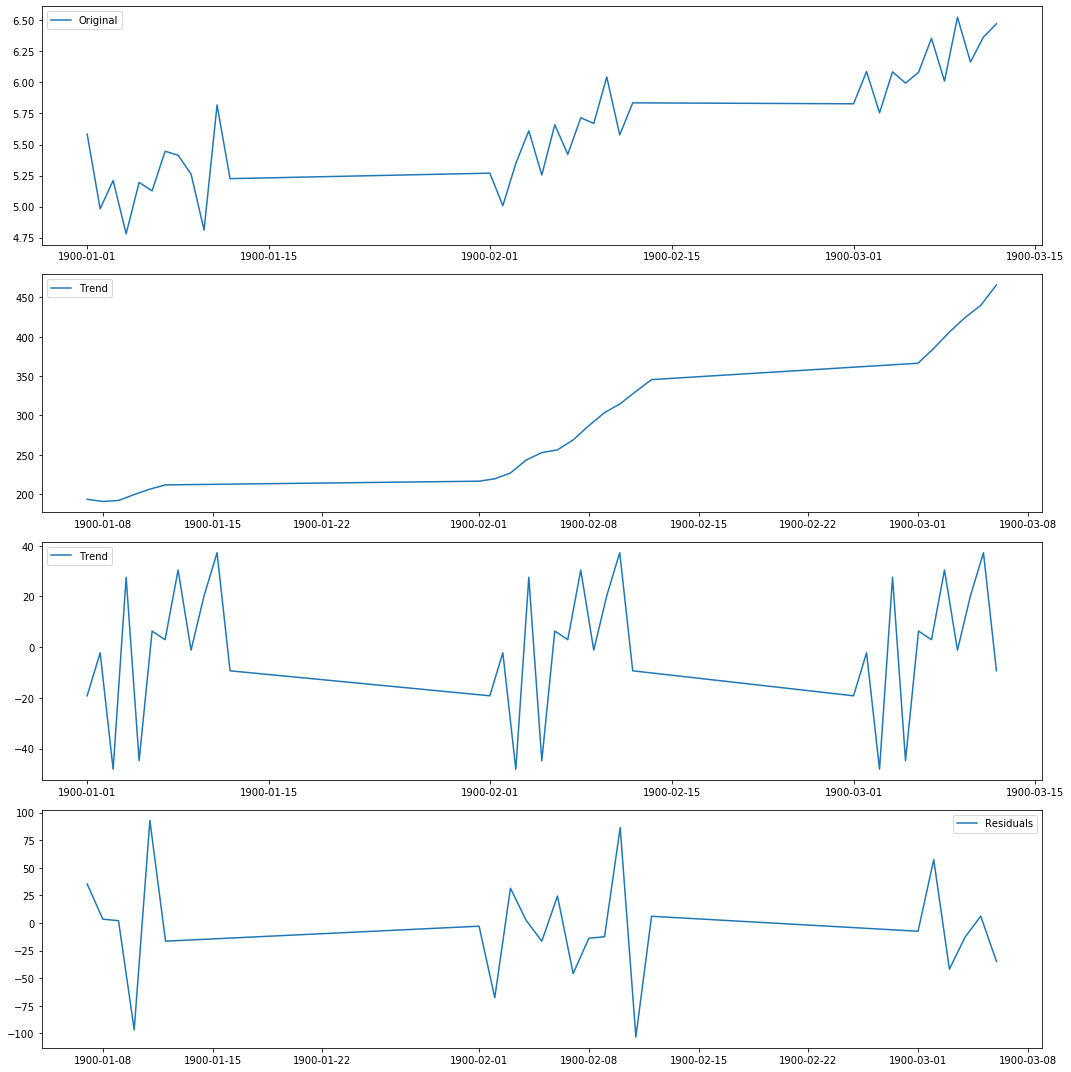

In [44]:
f, axs = plt.subplots(2,2,figsize=(15,15))

plt.subplot(411)
plt.plot(shampoo_logscale, label='Original')
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal, label='Trend')
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc="best")

plt.tight_layout()

Now we will check if the residual (noise) data is stationary or not

In [45]:
decomposed_shampoo_data = residual
decomposed_shampoo_data.dropna(inplace=True)

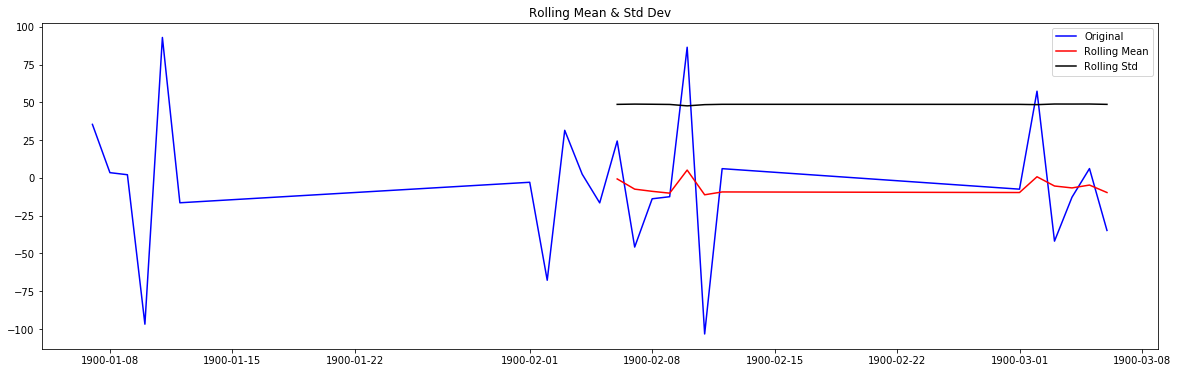

Result of Dickey-Fuller Test:
Test Statistic              -0.991914
p-value                      0.756202
#Lags Used                   6.000000
No. of Observations Used    17.000000
Critical Value (1%)         -3.889266
Critical Value (5%)         -3.054358
Critical Value (10%)        -2.666984
dtype: float64


In [46]:
# Determine Rolling Statistic
movingAverage = decomposed_shampoo_data.rolling(window=12).mean()
movingSTD = decomposed_shampoo_data.rolling(window=12).std()

# Plot rolling statistics:
plt.figure(figsize=(20,6))
orig = plt.plot(decomposed_shampoo_data, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')

plt.legend(loc='best')
plt.title("Rolling Mean & Std Dev")
plt.show(block=False)

# Perform Dickey-Fuller test:
print("Result of Dickey-Fuller Test:")
df_test = adfuller(decomposed_shampoo_data.values, autolag='AIC')
dfoutput = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'No. of Observations Used'])
for key, value in df_test[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

### Now let's try ARIMA model:

#### ARIMA model is a combo of different time-series forecast methods.
#### AR: Auto-Regressive & MA: Moving Average
#### ARIMA model takes in 3 paramters, p,q and d
#### If you only want to implement the AR method of ARIMA, then set p to a non-zero value and the q,d = 0
#### If you only want to implement the MA method of ARIMA, then set d to a non-zero value and the p,q = 0
#### But how to do we determine the value of p,q,d?
#### For that we need to do the ACF (to evaluate parameter q ) and PACF (to evaluate parameter p) analysis
#### We already have d=1 from earlier

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

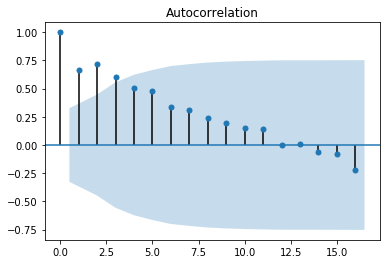

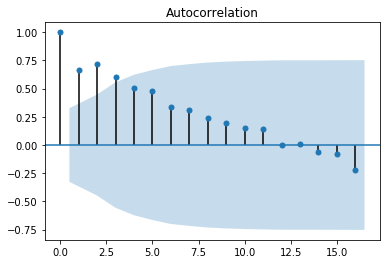

In [48]:
plot_acf(shampoo)

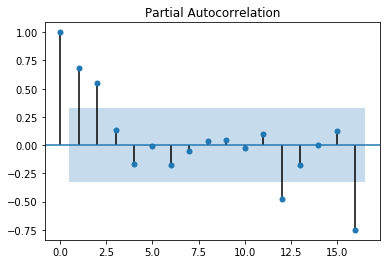

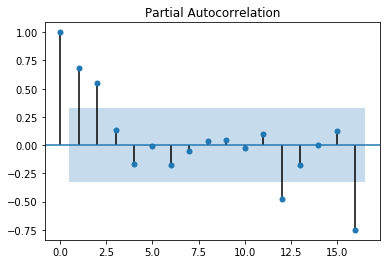

In [49]:
plot_pacf(shampoo)

#### Initially I thought p and q should be 3 because there are 3 significant levels outside of the confidence zone (blue zone)
#### But modelling with those values gives me an error, so I went with plugged in other values to see how they perform

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [51]:
shampoo_diff = shampoo.diff().fillna(shampoo)

c:\users\shafi\desktop\data science project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\shafi\desktop\data science project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Text(0.5, 1.0, 'RSS: 156514.5958')

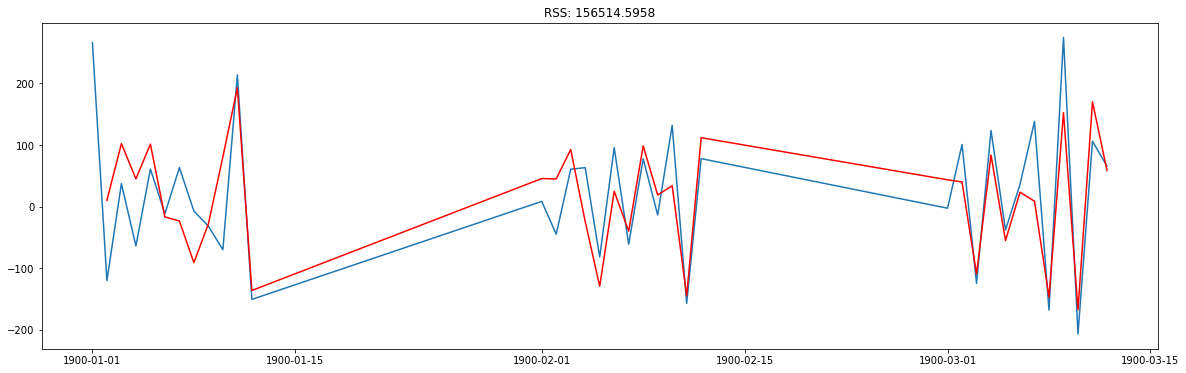

In [84]:
# AR Model
model = ARIMA(shampoo['Sales'], order=(0,1,2))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(20,6))
plt.plot(shampoo_diff)
plt.plot(results_AR.fittedvalues, color='red')

plt.title('RSS: %.4f'% sum((results_AR.fittedvalues.values - shampoo_diff['Sales'][1:])**2))

#### This doesn't look that great as the RSS value is very high. 

#### Let's try SARIMAX
#### It's the same as ARIMA but you can add seasonal order
#### Reference for SARIMAX: https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

In [53]:
import statsmodels.api as sm

In [54]:
# The first 3 values of seasonal_order are same as order, 4th value 12, states the cycle of the trend. 
# The shampoo dataset has data for 12 days from each month, so I used 12

model = sm.tsa.statespace.SARIMAX(shampoo['Sales'], order=(2,1,2), seasonal_order=(2,1,2,12))
results = model.fit()

c:\users\shafi\desktop\data science project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\shafi\desktop\data science project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\shafi\desktop\data science project\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



In [57]:
# Adding future dates for forecast
future_dates= ['1900-04-01', '1900-04-02', '1900-04-03', '1900-04-04',
               '1900-04-05', '1900-04-06', '1900-04-07', '1900-04-08',
               '1900-04-09', '1900-04-10', '1900-04-11', '1900-04-12']

In [58]:
# Converting future dates to datetime format

from datetime import datetime

dates_list = [datetime.strptime(date, '%Y-%m-%d').date() for date in future_dates]

In [59]:
futures_dates_df = pd.DataFrame(index=future_dates[1:], columns=shampoo.columns)

In [60]:
# Creating a new df using past data and future dates

future_df = pd.concat([shampoo, futures_dates_df])

In [61]:
future_df

,Sales,forecast
1900-01-01 00:00:00,266.0,NaN
1900-01-02 00:00:00,145.9,NaN
1900-01-03 00:00:00,183.1,NaN
1900-01-04 00:00:00,119.3,NaN
1900-01-05 00:00:00,180.3,NaN
1900-01-06 00:00:00,168.5,NaN
1900-01-07 00:00:00,231.8,NaN
1900-01-08 00:00:00,224.5,NaN
1900-01-09 00:00:00,192.8,NaN
1900-01-10 00:00:00,122.9,NaN


In [87]:
future_df['forecast'] = results.predict(start=35, end=47, dynamic=True)

c:\users\shafi\desktop\data science project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



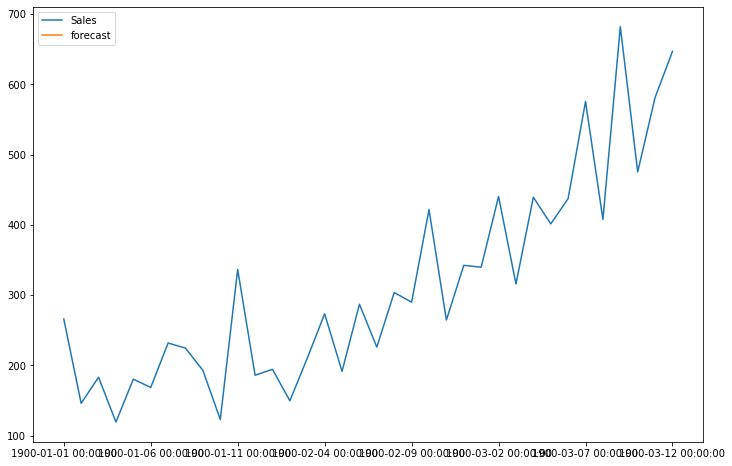

In [88]:
future_df[['Sales', 'forecast']].plot(figsize=(12,8))

#### Something is not working, the forecast plot is not showing up